In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare

Fitted n: 5.20e-13 ± 5.79e-07
Fitted s: 3.26e-13 ± 3.63e-07


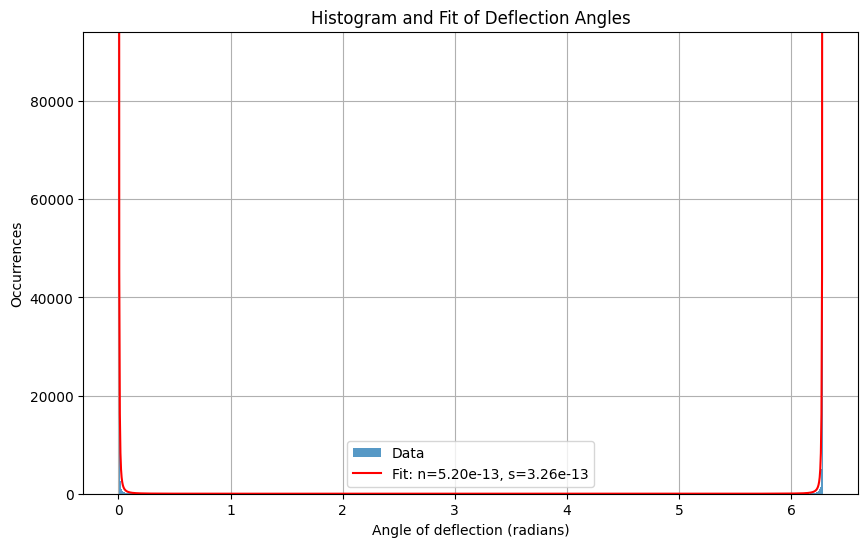

In [2]:
## FITTING WITH THE FIRST UNI FUNCTION QITH PARAMETRS N,S
# Define the fit function
def fit_uni_first(x, n, s):
    return n / (2 * s * np.sin(x / 2)**2)

# Load data from file
data = np.loadtxt('angulars.txt')

# Define histogram parameters
bins = 1200
range_min, range_max = 0, 2 * np.pi

# Create histogram
hist, bin_edges = np.histogram(data, bins=bins, range=(range_min, range_max))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Initial parameter values for fitting
initial_params = [2.25E-14, 1.44E-10]

# Fit the histogram data
popt, pcov = curve_fit(fit_uni_first, bin_centers, hist, p0=initial_params)
fitted_n, fitted_s = popt
#######################################################################################################
# Extract errors on parameters (standard deviations)
errors = np.sqrt(np.diag(pcov))
error_n, error_s = errors

# Print fitted parameters and their uncertainties
print(f"Fitted n: {fitted_n:.2e} ± {error_n:.2e}")
print(f"Fitted s: {fitted_s:.2e} ± {error_s:.2e}")
########################################################################################################
# Calculate expected values and normalize them
expected_values = fit_uni_first(bin_centers, fitted_n, fitted_s)
expected_values *= sum(hist) / sum(expected_values)  # Normalize to match the sum of observed values

# Calculate reduced chi-squared
chi2, p = chisquare(hist, f_exp=expected_values)
reduced_chi2 = chi2 / (len(hist) - 2)

# Plot histogram and fit
plt.figure(figsize=(10, 6))
plt.hist(data, bins=bins, range=(range_min, range_max), label='Data', alpha=0.75)
plt.plot(bin_centers, expected_values, 'r-', label='Fit: n=%.2e, s=%.2e' % tuple(popt))

# Add reduced chi-squared to the plot
plt.legend(loc='best')
plt.xlabel('Angle of deflection (radians)')
plt.ylabel('Occurrences')
plt.title('Histogram and Fit of Deflection Angles')
#plt.text(1.5, max(hist) * 0.8, 'Reduced Chi-squared: %.2f' % reduced_chi2, fontsize=12, color='red')
plt.grid(True)

# Set y-axis limits
plt.ylim(0, max(hist) * 0.2)  # Adjust the factor 0.2 as needed to show less of the y-axis

# Show plot
plt.show()

Fitted r: 1.46e-08 ± 2.53e-02


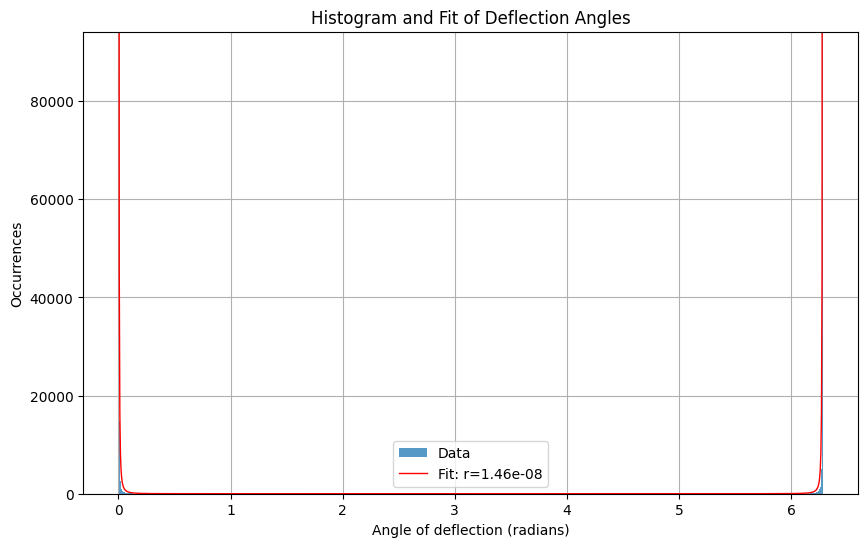

In [3]:
## FITTING WITH THE SECOND UNI FUNCTION WITH PARAMETER R
#Define the new fit function
def fit_uni_second(x, r):
    return r / (2 * np.sin(x / 2)**2)

# Load data from file
data = np.loadtxt('angulars.txt')

# Define histogram parameters
bins = 1200
range_min, range_max = 0, 2 * np.pi

# Create histogram
hist, bin_edges = np.histogram(data, bins=bins, range=(range_min, range_max))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Initial parameter value for fitting
initial_params = [1.44E-10]  # Example initial value for r

# Fit the histogram data
popt, pcov = curve_fit(fit_uni_second, bin_centers, hist, p0=initial_params)
fitted_r = popt[0]
######################################################################################################
# Calculate the error on the parameter
error_r = np.sqrt(np.diag(pcov))[0]
# Print fitted parameter and its uncertainty
print(f"Fitted r: {fitted_r:.2e} ± {error_r:.2e}")
######################################################################################################

# Calculate expected values and normalize them
expected_values = fit_uni_second(bin_centers, fitted_r)
expected_values *= sum(hist) / sum(expected_values)  # Normalize to match the sum of observed values

# Calculate reduced chi-squared
chi2, p = chisquare(hist, f_exp=expected_values)
reduced_chi2 = chi2 / (len(hist) - 1)

# Plot histogram and fit
plt.figure(figsize=(10, 6))
plt.hist(data, bins=bins, range=(range_min, range_max), label='Data', alpha=0.75)
plt.plot(bin_centers, expected_values, 'r-', label='Fit: r=%.2e' % fitted_r, linewidth=1)

# Add reduced chi-squared to the plot
plt.legend(loc='best')
plt.xlabel('Angle of deflection (radians)')
plt.ylabel('Occurrences')
plt.title('Histogram and Fit of Deflection Angles')
#plt.text(1.5, max(hist) * 0.8, 'Reduced Chi-squared: %.2f' % reduced_chi2, fontsize=12, color='red')
plt.grid(True)

# Set y-axis limits
plt.ylim(0, max(hist) * 0.2)  # Adjust the factor 0.2 as needed to show less of the y-axis

# Show plot
plt.show()
